# AirBnB Seattle Data Analysis Script

### The project follows CRISP DM Process, and each phase will be stated below

## Business Understanding
#### Business Objective
The business objective of this analysis is to identify the factors contributing to bookings to increase profits for AirBnB and their hosts who list their properties in Seattle, WA area.
#### Business Questions
1. Does property neighborhood have effect on popularity?
2. Does Superhost status have effect on popularity?
3. Does Host ID Verification Status have effect on popularity?
4. Does Property Type have effect on popularity?
5. Does Host Response have effect on popularity?

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kdeside1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Define Functions

In [2]:
def bar_plot(df, figsize, title, rot=None, loc=None, anchor=None):
    """ Creates bar plot
    Input:  df=dataframe, fisize=graph size in tuple, title=graph title in string, rot=x-label rotation, 
    loc=legend position, anchor=legend starting point """
    fig = df.plot(kind='bar', rot=rot, figsize=figsize, use_index=True, title=title, \
                 color=['#305496','#F3A875'], fontsize=14)
    fig.axes.title.set_size(20)
    fig.legend(fontsize=14, loc=loc, bbox_to_anchor=anchor)


def concat_graph_df(df1, df2, field, col_names, index=None):
    """Concatenate 2 Series or Dataframes and returns a dataframe to be plotted
    Input:  df1=dataframe or Series, df2=dataframe or Series, field=column containing X value, 
    col_names=column names for the new graph dataframe """
    graph_df = pd.concat([df1[field].value_counts(normalize=True), df2[field].value_counts(normalize=True)], axis=1)
    graph_df.columns=col_names
    if not index is None:
        graph_df.index=index
    return graph_df

### Read the data file

In [3]:
df_calendar = pd.read_csv('./Data/calendar.csv', encoding='utf-8')

In [4]:
print(df_calendar.shape)
df_calendar.head()

(1531652, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1355094,2021-02-21,f,$27.00,$26.00,30.0,1125.0
1,1356339,2021-02-21,f,$119.00,$119.00,2.0,1125.0
2,1356339,2021-02-22,f,$119.00,$119.00,2.0,1125.0
3,1356339,2021-02-23,f,$119.00,$119.00,2.0,1125.0
4,1356339,2021-02-24,f,$119.00,$119.00,2.0,1125.0


In [5]:
print('The starting date of this dataset:  {}'.format(df_calendar['date'].min()))
print('The ending date of this dataset:  {}'.format(df_calendar['date'].max()))

The starting date of this dataset:  2021-02-21
The ending date of this dataset:  2022-02-21


In [6]:
df_listing = pd.read_csv('./Data/listings.csv', encoding='utf-8')

In [7]:
print(df_listing.shape)
df_listing.head()

(4197, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20210221060053,2021-02-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,t,1,1,0,0,0.21
1,9419,https://www.airbnb.com/rooms/9419,20210221060053,2021-02-22,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,STR-OPLI-19-003039,f,7,0,7,0,1.15
2,9531,https://www.airbnb.com/rooms/9531,20210221060053,2021-02-22,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37
3,9534,https://www.airbnb.com/rooms/9534,20210221060053,2021-02-22,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50
4,9596,https://www.airbnb.com/rooms/9596,20210221060053,2021-02-21,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,https://www.airbnb.com/users/show/14942,...,9.0,10.0,9.0,STR-OPLI-19-002622,f,2,2,0,0,0.82


## Data Understanding

In [8]:
## Columns in df_listing
df_listing.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [9]:
## df_listing stats
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.197000e+03,4.197000e+03,4.197000e+03,4193.000000,4193.000000,4197.000000,4197.000000,4197.000000,0.0,3619.000000,...,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,4197.000000,4197.000000,4197.000000,4197.000000,3429.000000
mean,2.750170e+07,2.021022e+13,8.494779e+07,133.539232,133.539232,47.624849,-122.334593,3.659757,NaN,1.568942,...,9.655908,9.847794,9.832988,9.838022,9.517619,18.287586,16.873481,1.141291,0.235406,1.910490
std,1.514280e+07,2.031492e-01,1.036887e+08,365.787002,365.787002,0.046859,0.033056,2.254967,NaN,0.906574,...,0.760036,0.610378,0.613775,0.458076,0.827404,38.367155,38.339453,4.015853,2.122748,1.753745
min,2.318000e+03,2.021022e+13,2.536000e+03,0.000000,0.000000,47.496210,-122.418760,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.490220e+07,2.021022e+13,8.607308e+06,1.000000,1.000000,47.604570,-122.356340,2.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.530000
50%,2.792874e+07,2.021022e+13,3.983446e+07,2.000000,2.000000,47.620930,-122.334570,3.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.410000
75%,4.224708e+07,2.021022e+13,1.187390e+08,10.000000,10.000000,47.660090,-122.310960,4.000000,NaN,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,0.000000,0.000000,2.810000
max,4.825671e+07,2.021022e+13,3.888968e+08,1398.000000,1398.000000,47.733530,-122.245540,16.000000,NaN,7.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,146.000000,146.000000,32.000000,21.000000,12.130000


#### Identify and understand the columns with missing values in order to determine which columns should or should not be used in the analysis
The dataset is small in size (4197 rows), and any missing values can be critical so the number of null values must be minimal in the fields used in the analysis.

Based on the assessment below, it was concluded that 20% of missing data was the optimal threshold to drop the column.
The reasons are as follows:

20%:  Neighborhood_overview and neighborhood can be replaced with other neighborhood fields, host_about is subjective string content and is not imputable, and license is also subjective to each location and does not correlate to the listing popularity.

15%:  Contains many score and host response data which may not be obtained due to the data containing the future bookings).  15% threshold could lose too many critical fields

In [10]:
## Identify the columns which are missing 20% or more values
print('The following columns have 20% or more null values and will be removed:')
print(df_listing.columns[df_listing.isna().sum()/df_listing.shape[0] >= .20])

The following columns have 20% or more null values and will be removed:
Index(['neighborhood_overview', 'host_about', 'neighbourhood', 'bathrooms',
       'calendar_updated', 'license'],
      dtype='object')


In [11]:
## Identify the columns which are missing 15% or more values
print('The following columns have 15% or more null values and will be removed:')
print(df_listing.columns[df_listing.isna().sum()/df_listing.shape[0] >= .15])

The following columns have 15% or more null values and will be removed:
Index(['neighborhood_overview', 'host_about', 'host_response_time',
       'host_response_rate', 'neighbourhood', 'bathrooms', 'calendar_updated',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')


#### Identify popular listings from not so popular listings.

In [13]:
## Add the percentage of booking.  -- Higher the percentage, more popular the listing
## Higher the number, the popular the listing 
df_listing['Booking Percentage'] = (365-df_listing['availability_365'])/365 * 100

#### In this analysis, it will be defined as popular listing if the property has 80% or more booking

In [16]:
pop_list_percent = df_listing[df_listing['Booking Percentage']>=80].shape[0] / df_listing.shape[0] * 100
print('{:.1f} % of the Seattle Listings already has 80% booked until {}'.format(pop_list_percent, df_calendar['date'].max()))

28.1 % of the Seattle Listings already has 80% booked until 2022-02-21


#### Quick check of the numerical columns for any significant correlation to popularity

In [19]:
## Using correlation coefficience for numerical columns did not show any significant correlation for popular listings
abs(df_listing.corr()['Booking Percentage'])>=0.3

id                                              False
scrape_id                                       False
host_id                                         False
host_listings_count                             False
host_total_listings_count                       False
latitude                                        False
longitude                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
minimum_nights                                  False
maximum_nights                                  False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights                          False
minimum_nights_avg_ntm                          False
maximum_nights_avg_ntm      

In [ ]:
## The correlation to these numerical columns did not show any significant relationship.  
## Booking percentage was calculated based on availability_365, 
## and this is why 'availability_*' columns are showing correlation

## Data preparation

### Clean the dataframes by removing columns with no or little values

In [20]:
df_listing_cp = df_listing.copy()

In [21]:
df_null_thld = df_listing_cp.columns[df_listing_cp.isna().sum()/df_listing_cp.shape[0] >= .20]
df_listing_cp.drop(columns=df_null_thld, inplace=True)
print('Based on the threshold determined previously, {} columns have been removed'.format(len(df_null_thld)))

Based on the threshold determined previously, 6 columns have been removed


## Data Modeling

### 1. Does property neighborhood have effect on popularity?

In [22]:
df_popular_listing = df_listing_cp[df_listing_cp['Booking Percentage']>=80]
df_other_listing = df_listing_cp[df_listing_cp['Booking Percentage']<80]

In [23]:
graphdf_columns=['More Than 80% Booked','Less Than 80% Booked']

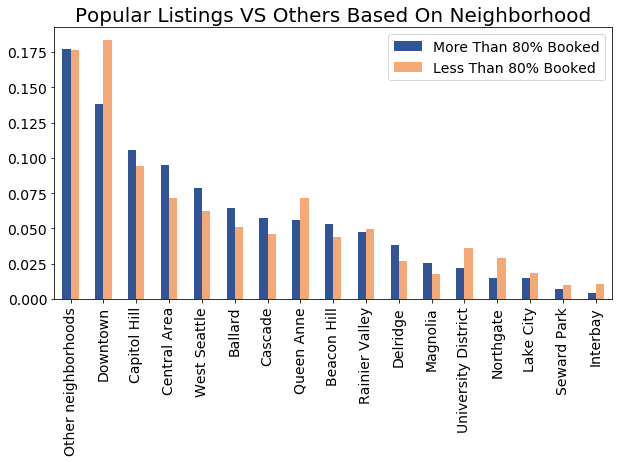

In [24]:
## Check neighbourhood_group_cleansed of popular listings
bar_plot(concat_graph_df(df_popular_listing, df_other_listing, 'neighbourhood_group_cleansed', graphdf_columns), \
         (10,5), 'Popular Listings VS Others Based On Neighborhood', 90)

### 2. Does Superhost status have effect on popularity?

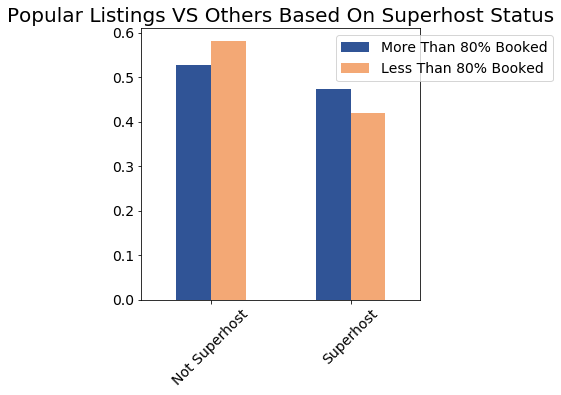

In [25]:
bar_plot(concat_graph_df(df_popular_listing, df_other_listing, 'host_is_superhost', graphdf_columns, ['Not Superhost','Superhost']), \
         (5,5), 'Popular Listings VS Others Based On Superhost Status', 45, 'upper right', (1.5, 1))

### 3. Does Host ID Verification Status have effect on popularity?

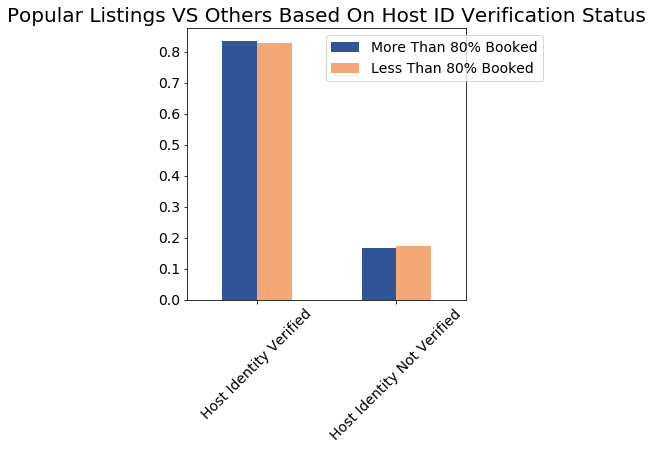

In [26]:
## Check correlation to host ID verification status
bar_plot(concat_graph_df(df_popular_listing, df_other_listing, 'host_identity_verified', graphdf_columns, ['Host Identity Verified','Host Identity Not Verified']), \
         (5,5), 'Popular Listings VS Others Based On Host ID Verification Status', 45, 'upper right', (1.3, 1))

### 4. Does Property Type have effect on popularity?

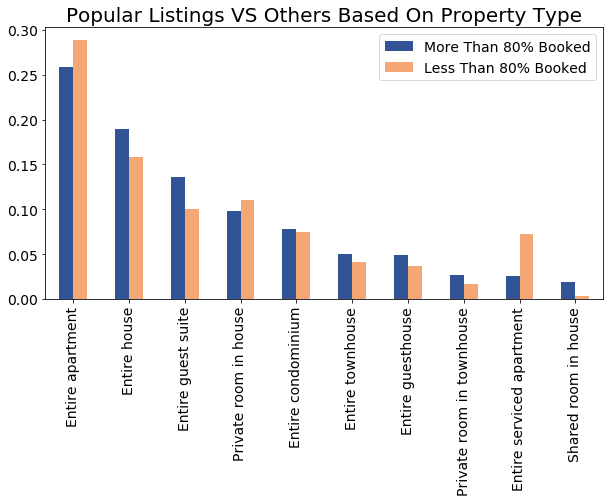

In [27]:
## Check correlation to property type
df_propertyType=pd.concat([df_popular_listing['property_type'].value_counts(normalize=True),\
                           df_other_listing['property_type'].value_counts(normalize=True)], axis=1)
df_propertyType.columns=graphdf_columns
bar_plot(df_propertyType.iloc[:10,:], (10,5), 'Popular Listings VS Others Based On Property Type', 90)

### 5. Does Host Response have effect on popularity?

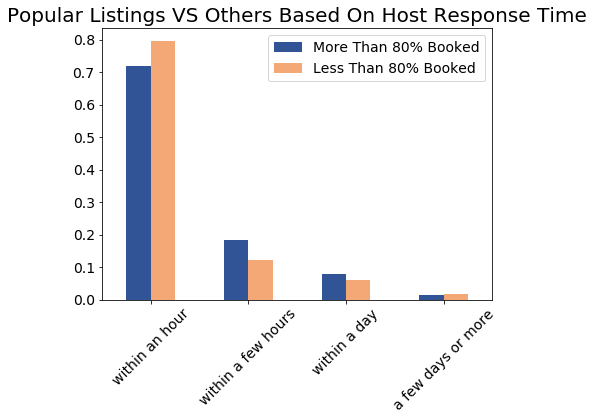

In [28]:
## Check correlation to Host Response Time
bar_plot(concat_graph_df(df_popular_listing, df_other_listing, 'host_response_time', graphdf_columns), \
         (7,5), 'Popular Listings VS Others Based On Host Response Time', 45)

In [29]:
## Categorize the response rate percentage to bins
bins=[-1,50,75,90,100]
labels = ['0-50%','50-75%','75-90%','90-100%']

df_pop_resp_rate = pd.cut(df_popular_listing['host_response_rate'].str.replace('%','').fillna(0).astype(int), bins=bins, labels=labels)
df_other_resp_rate = pd.cut(df_other_listing['host_response_rate'].str.replace('%','').fillna(0).astype(int), bins=bins, labels=labels)

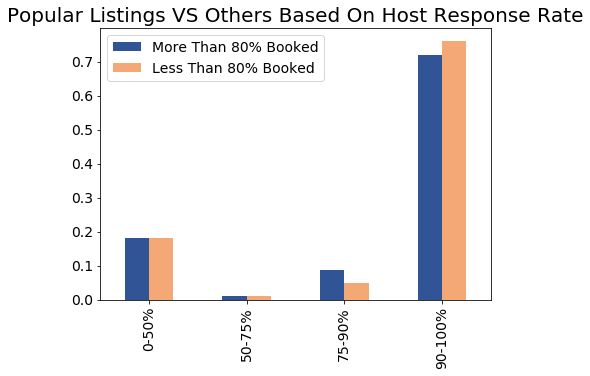

In [30]:
df_resp_rate=pd.concat([df_pop_resp_rate.value_counts(normalize=True, sort=False), \
                        df_other_resp_rate.value_counts(normalize=True, sort=False)], axis=1)
df_resp_rate.columns=graphdf_columns
bar_plot(df_resp_rate, (7,5), 'Popular Listings VS Others Based On Host Response Rate', 90)

## Results Evaluation

#### Conclusion:  The selected metadata -- Neighbourhood, Superhost Status, Property Type and Host Response all showed some patterns in each group except the diffference in Host ID Verification status was very minimal.

1. Some of the neighbourhood were identified as slightly more popular than others.

2. Superhost status was slightly advantageous than non-Superhost status.

3. The difference for Host ID Verification status was very minimal.

4. Entire property appealed to more customers than shared rooms and apartment.

5. Although being responsive appealed to more customers, but it does not necessarily have to be prompt.